Epoch 0, Train Loss: 0.6893, Val Loss: 0.6894, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6630, Val Loss: 0.6636, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6528, Val Loss: 0.6537, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6490, Val Loss: 0.6500, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6473, Val Loss: 0.6485, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6470, Val Loss: 0.6482, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6479, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6466, Val Loss: 0.6479, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6465, Val Loss: 0.6478, Train Acc: 0.6515, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6465, Val Loss: 0.6479, Train Acc: 0.6515, Val Acc: 0.6494
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


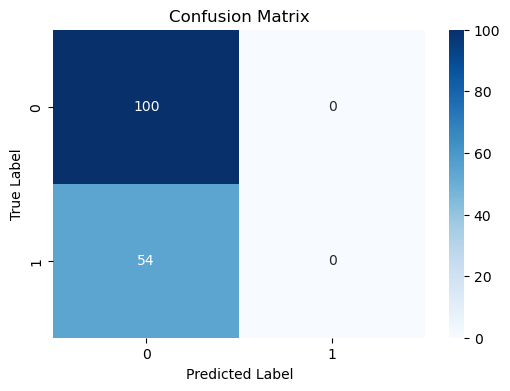

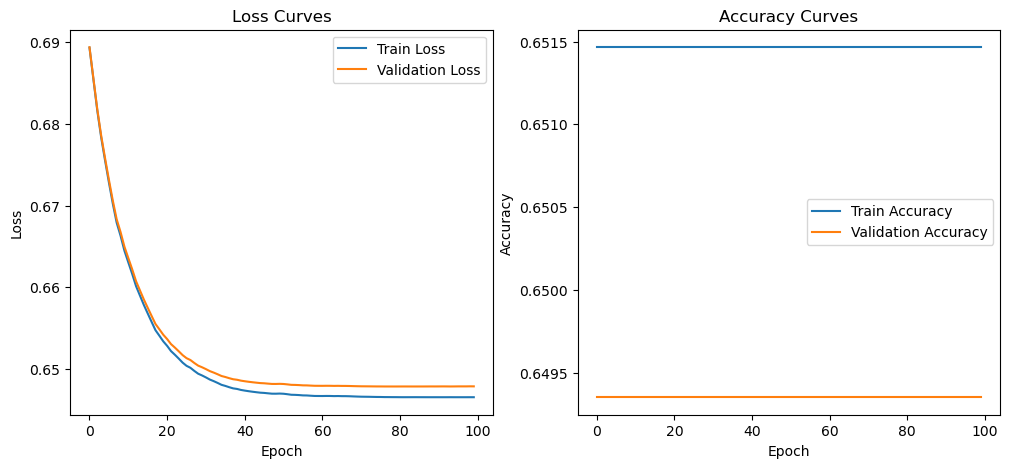

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Activation functions
def relu(x):
    """ReLU activation: max(0, x)"""
    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    """Derivative of ReLU: 1 if x > 0, else 0"""
    result = np.where(x > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    """Sigmoid activation: 1 / (1 + exp(-x))"""
    result = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0,1]"
    return result

def sigmoid_derivative(x):
    """Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))"""
    sig = sigmoid(x)
    result = sig * (1 - sig)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0,0.25]"
    return result

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        """Initialize the neural network with layer sizes and learning rate."""
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01
            b = np.zeros((1, layer_sizes[i + 1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i + 1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i + 1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """Forward propagation: Z^{[l]} = A^{[l-1]} * W^{[l]} + b^{[l]}, A^{[l]} = g(Z^{[l]})"""
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        self.activations = [X]
        self.z_values = []
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            assert z.shape == (X.shape[0], self.layer_sizes[i + 1]), f"Z^{[i+1]} has incorrect shape"
            self.z_values.append(z)
            self.activations.append(relu(z))
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        assert z.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(z)
        output = sigmoid(z)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)
        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """Binary Cross-Entropy: J = -1/m * sum(y * log(y_pred) + (1-y) * log(1-y_pred))"""
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred):
        """Compute accuracy: proportion of correct predictions"""
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        predictions = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(predictions == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs, l2_lambda=0.01):
        """Backpropagation: compute dW^{[l]}, db^{[l]} for each layer"""
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"
        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"
        self.d_weights[-1] = (np.dot(self.activations[-2].T, dZ) / m) + (l2_lambda * self.weights[-1] / m)
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m
        for i in range(len(self.weights) - 2, -1, -1):
            dZ = np.dot(dZ, self.weights[i + 1].T) * relu_derivative(self.z_values[i])
            self.d_weights[i] = (np.dot(self.activations[i].T, dZ) / m) + (l2_lambda * self.weights[i] / m)
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * self.d_weights[i]
            self.biases[i] -= self.learning_rate * self.d_biases[i]

    def train(self, X, y, X_val, y_val, epochs, batch_size, l2_lambda=0.01):
        """Train the neural network using mini-batch SGD with validation"""
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            epoch_loss = 0
            for i in range(0, X.shape[0], batch_size):
                batch_indices = indices[i:min(i + batch_size, X.shape[0])]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                outputs = self.forward(X_batch)
                epoch_loss += self.compute_loss(y_batch, outputs)
                self.backward(X_batch, y_batch, outputs, l2_lambda)
            train_loss = self.compute_loss(y, self.forward(X))
            val_loss = self.compute_loss(y_val, self.forward(X_val))
            train_accuracy = self.compute_accuracy(y, self.forward(X))
            val_accuracy = self.compute_accuracy(y_val, self.forward(X_val))
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")
        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """Predict class labels (0 or 1)"""
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        outputs = self.forward(X)
        return (outputs >= 0.5).astype(int)

def main():
    # Load and preprocess data
    data = pd.read_csv('diabetes.csv')
    for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        data[column] = data[column].replace(0, data[column].median())
    X = data.drop('Outcome', axis=1).values
    y = data['Outcome'].values.reshape(-1, 1)
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Train model
    nn = NeuralNetwork(layer_sizes=[X_train.shape[1], 16, 8, 1], learning_rate=0.01)
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_test, y_test, epochs=100, batch_size=32, l2_lambda=0.01)
    
    # Evaluate
    y_pred = nn.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    #plt.savefig('confusion_matrix.png')
    plt.show()
    plt.close()
    
    # Loss and accuracy curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_title('Loss Curves')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(train_accuracies, label='Train Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_title('Accuracy Curves')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    #plt.savefig('training_curves.png')
    plt.show()
    plt.close()

if __name__ == "__main__":
    main()